<a href="https://www.kaggle.com/code/virajvhatkar/vide-game-release-2022-analysis?scriptVersionId=118097009" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [171]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 

import seaborn as sns 

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/video-games-released-in-2022/video-games-2022.csv
/kaggle/input/video-game/video_games_2022.csv


In [172]:
from plotly.offline import init_notebook_mode, iplot

init_notebook_mode(connected=True) 

In [173]:
data=pd.read_csv("/kaggle/input/video-game/video_games_2022.csv")#reading the File
#pd.set_option('display.max_rows', None)

In [174]:
data.isnull().sum()  #checking the Missing Values

Month           0
Day             0
Title           0
Platform(s)     0
Genre(s)        0
Developer(s)    0
Publisher(s)    0
dtype: int64

In [175]:
data[data.duplicated()]  #finding duplicate values

,Month,Day,Title,Platform(s),Genre(s),Developer(s),Publisher(s)


In [176]:
data.info()  #understanding the data types of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 987 entries, 0 to 986
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Month         987 non-null    object
 1   Day           987 non-null    int64 
 2   Title         987 non-null    object
 3   Platform(s)   987 non-null    object
 4   Genre(s)      987 non-null    object
 5   Developer(s)  987 non-null    object
 6   Publisher(s)  987 non-null    object
dtypes: int64(1), object(6)
memory usage: 54.1+ KB


In [177]:
data.head()

,Month,Day,Title,Platform(s),Genre(s),Developer(s),Publisher(s)
0,JANUARY,3,Freddi Fish 3: The Case of the Stolen Conch Shell,NS,Adventure,Humongous Entertainment,UFO Interactive Games
1,JANUARY,3,Putt-Putt Travels Through Time,NS,Adventure,Humongous Entertainment,UFO Interactive Games
2,JANUARY,4,Deep Rock Galactic,"PS4, PS5",First-person shooter,Ghost Ship Games,Coffee Stain Publishing
3,JANUARY,4,The Pedestrian,"XBO, XSX","Puzzle, platform",Skookum Arts LLC,Skookum Arts LLC
4,JANUARY,6,Demon Gaze Extra,"NS, PS4",Role-playing,Cattle Call,Clouded Leopard Entertainment


In [178]:
data_1=data

In [179]:
#data_1['Month']=data_1['Month'].astype(str)

#### If the condition is only for one
### #np.where(condition, value if condition is true, value if condition is false)  

#### For Multiple conditions
### data_1['Month_1']=np.select(condition,value) .Example is given below


#create a list of our conditions
conditions = [
    (df['likes_count'] <= 2),
    (df['likes_count'] > 2) &  (df['likes_count'] <= 9),
    (df['likes_count'] > 9) & (df['likes_count'] <= 15),
    (df['likes_count'] > 15)
    ]

#create a list of the values we want to assign for each condition
values = ['tier_4', 'tier_3', 'tier_2', 'tier_1']

#create a new column and use np.select to assign values to it using our lists as arguments
df['tier'] = np.select(conditions, values)

#display updated DataFrame
df.head()

In [180]:
condition=[(data_1['Month']=='JANUARY'),(data_1['Month']=='FEBRUARY') , (data_1['Month']=='MARCH') , (data_1['Month']=='APRIL'),
          (data_1['Month']=='MAY') , (data_1['Month']=='JUNE') , (data_1['Month']=='JULY'),
          (data_1['Month']=='AUGUST') , (data_1['Month']=='SEPTEMBER') , (data_1['Month']=='OCTOBER') , (data_1['Month']=='NOVEMBER'),
          (data_1['Month']=='DECEMBER')]

value=[1,2,3,4,5,6,7,8,9,10,11,12]

data_1['Month_1']=np.select(condition,value)

#Making a month model having integers

In [181]:
data_2=data_1

In [182]:
data_2.describe(include='all')

,Month,Day,Title,Platform(s),Genre(s),Developer(s),Publisher(s),Month_1
count,987,987.000000,987,987,987,987,987,987.000000
unique,12,NaN,855,102,251,697,422,NaN
top,JUNE,NaN,Azure Striker Gunvolt 3,NS,Adventure,Square Enix,Square Enix,NaN
freq,127,NaN,4,184,72,13,32,NaN
mean,NaN,16.599797,NaN,NaN,NaN,NaN,NaN,6.584600
std,NaN,8.814457,NaN,NaN,NaN,NaN,NaN,3.097091
min,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,1.000000
25%,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,4.000000
50%,NaN,17.000000,NaN,NaN,NaN,NaN,NaN,7.000000
75%,NaN,24.000000,NaN,NaN,NaN,NaN,NaN,9.000000


In [183]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 987 entries, 0 to 986
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Month         987 non-null    object
 1   Day           987 non-null    int64 
 2   Title         987 non-null    object
 3   Platform(s)   987 non-null    object
 4   Genre(s)      987 non-null    object
 5   Developer(s)  987 non-null    object
 6   Publisher(s)  987 non-null    object
 7   Month_1       987 non-null    int64 
dtypes: int64(2), object(6)
memory usage: 61.8+ KB


## Data Visualization

In [184]:
data_2.head()

,Month,Day,Title,Platform(s),Genre(s),Developer(s),Publisher(s),Month_1
0,JANUARY,3,Freddi Fish 3: The Case of the Stolen Conch Shell,NS,Adventure,Humongous Entertainment,UFO Interactive Games,1
1,JANUARY,3,Putt-Putt Travels Through Time,NS,Adventure,Humongous Entertainment,UFO Interactive Games,1
2,JANUARY,4,Deep Rock Galactic,"PS4, PS5",First-person shooter,Ghost Ship Games,Coffee Stain Publishing,1
3,JANUARY,4,The Pedestrian,"XBO, XSX","Puzzle, platform",Skookum Arts LLC,Skookum Arts LLC,1
4,JANUARY,6,Demon Gaze Extra,"NS, PS4",Role-playing,Cattle Call,Clouded Leopard Entertainment,1


In [185]:
p=data_2['Platform(s)'].apply(lambda x:[i.strip() for i in x.split(',')]).explode().value_counts()
p1311=p

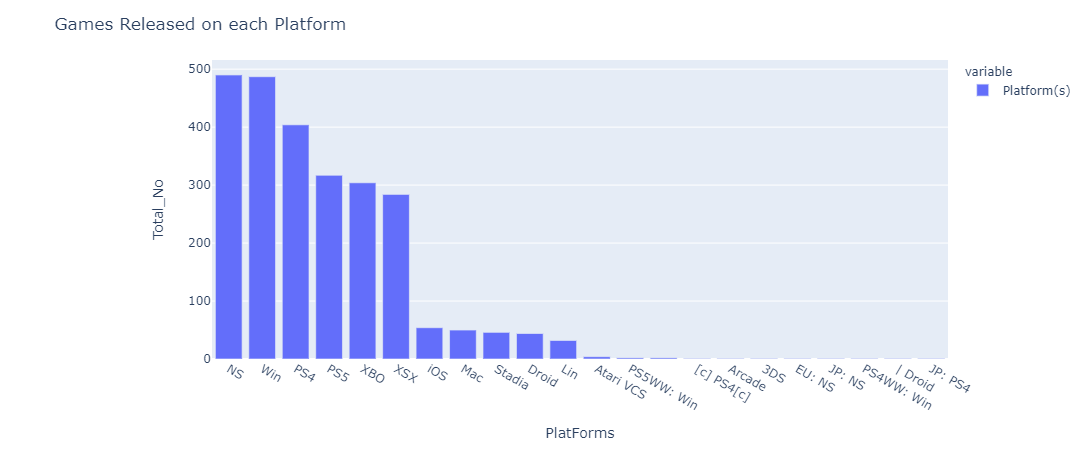

In [186]:
fig=px.bar(p)
fig_1=fig.update_xaxes(rangeslider_autorange=True)
#px.bar(p) #which Platform are the Game Released
#i.update_layout(
 #   title="Games Released on each Platform",
 #   xaxis_title="PlatForms",
 #   yaxis_title="Total_No")
t=px.bar(p)
t.update_layout(
    title="Games Released on each Platform",
    xaxis_title="PlatForms",
    yaxis_title="Total_No")

In [187]:
#which Platform are the Game Released
#px.bar(p)

### These are the top platforms where Games are released in which we can  clearly indicate Nintendo,Windows & Playstation tops the charts

In [188]:
#data_2['Month'] = data_2['Month'].dt.month

In [189]:
#data_2['Month'] = data_2['Month'].dt.month
Month_1=data_2['Month'].unique()
Month_1_value_count=data_2['Month'].value_counts().sort_index()

In [190]:
Mont_12=[57,74,71,63,83,127,112,95,110,76,70,49]

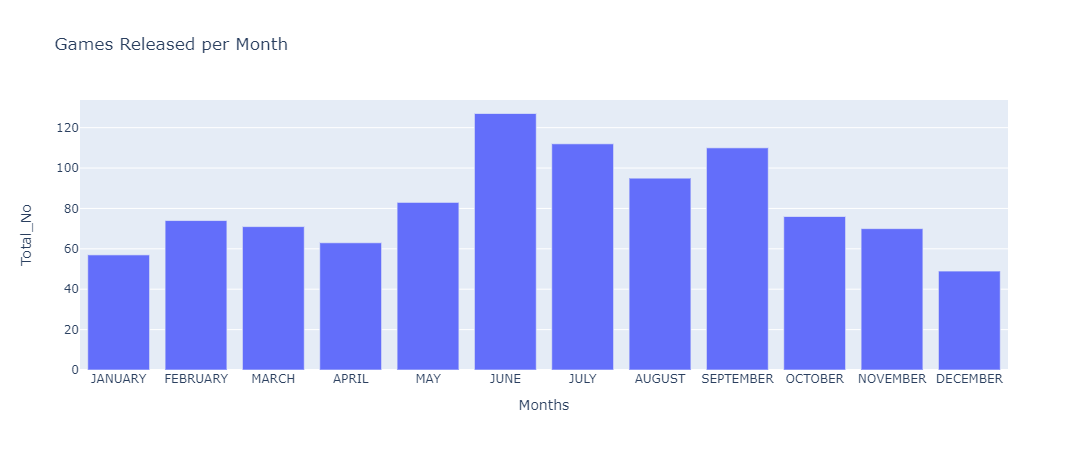

In [191]:
fig_2=px.bar(x=Month_1,y=Mont_12,title='Games Released per Month')
fig_2.update_layout(
    title="Games Released per Month",
    xaxis_title="Months",
    yaxis_title="Total_No")

### It seem that Most Publisher release the games in the First and Second Quater of the Year.

In [192]:
data_3=data_2[['Month','Day']]
data_3.head()

,Month,Day
0,JANUARY,3
1,JANUARY,3
2,JANUARY,4
3,JANUARY,4
4,JANUARY,6


In [193]:
#data_3

In [194]:
#data_3.style.hide_index()


In [195]:
#data_3

In [196]:
"""for month in data_3['Month'].unique():
    fig_3=px.line(x=data_3[data_3['Month'] == month]['Day'].unique(),
                  y=data_3[data_3['Month'] == month]['Day'].value_counts()
                 )"""
    #fig_3
    #Comple the above later

"for month in data_3['Month'].unique():\n    fig_3=px.line(x=data_3[data_3['Month'] == month]['Day'].unique(),\n                  y=data_3[data_3['Month'] == month]['Day'].value_counts()\n                 )"

In [197]:
#data_3['Day'].unique()


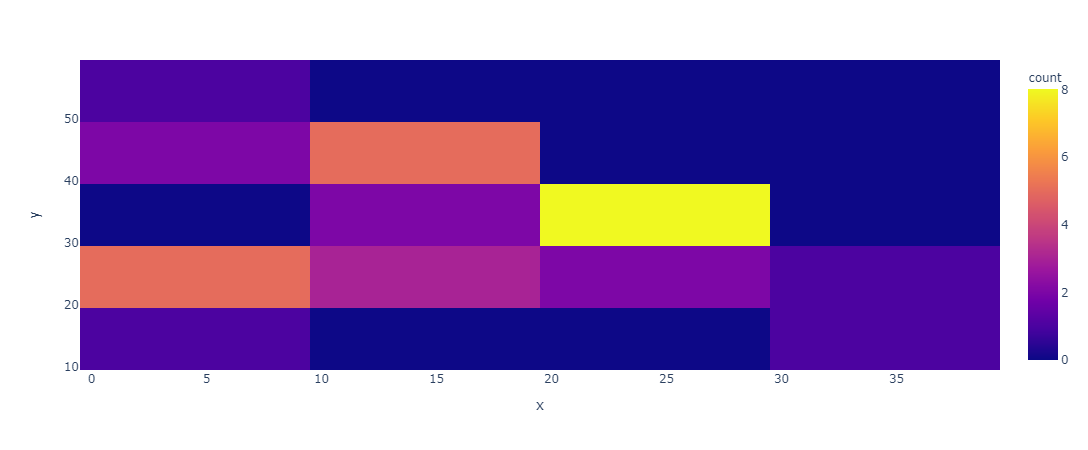

In [198]:
fig_2=px.density_heatmap(data_3,x=data_3['Day'].unique(),y=data_3['Day'].value_counts())
#fig_2.add_trace(go.Scatter(x=data_3['Day'].unique(), y=data_3['Day'].value_counts(), mode="lines"))
fig_2

In [199]:
#f = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/finance-charts-apple.csv')

In [200]:
#data_2['Month_1']=data_2['Month_1'].dtype=np.int64

In [201]:
data_2.head()

,Month,Day,Title,Platform(s),Genre(s),Developer(s),Publisher(s),Month_1
0,JANUARY,3,Freddi Fish 3: The Case of the Stolen Conch Shell,NS,Adventure,Humongous Entertainment,UFO Interactive Games,1
1,JANUARY,3,Putt-Putt Travels Through Time,NS,Adventure,Humongous Entertainment,UFO Interactive Games,1
2,JANUARY,4,Deep Rock Galactic,"PS4, PS5",First-person shooter,Ghost Ship Games,Coffee Stain Publishing,1
3,JANUARY,4,The Pedestrian,"XBO, XSX","Puzzle, platform",Skookum Arts LLC,Skookum Arts LLC,1
4,JANUARY,6,Demon Gaze Extra,"NS, PS4",Role-playing,Cattle Call,Clouded Leopard Entertainment,1


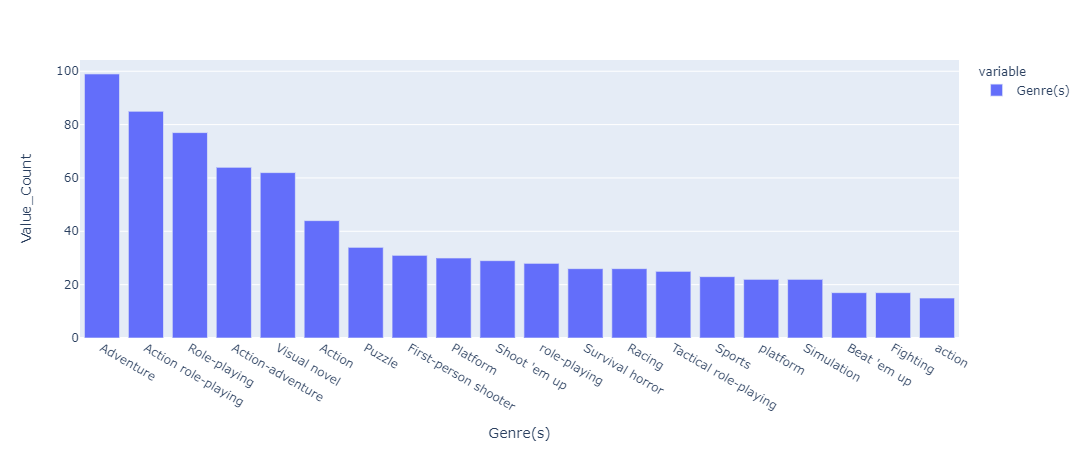

In [202]:
p_1=data_2['Genre(s)'].apply(lambda x:[i.strip() for i in x.split(',')]).explode().value_counts()[:20]
figure_2=px.bar(p_1)
figure_2.update_layout(
    title="",
    xaxis_title="Genre(s)",
    yaxis_title="Value_Count",
    legend_title="variable")

### The Developers Most favourable Genre are related to Action & Adventure.

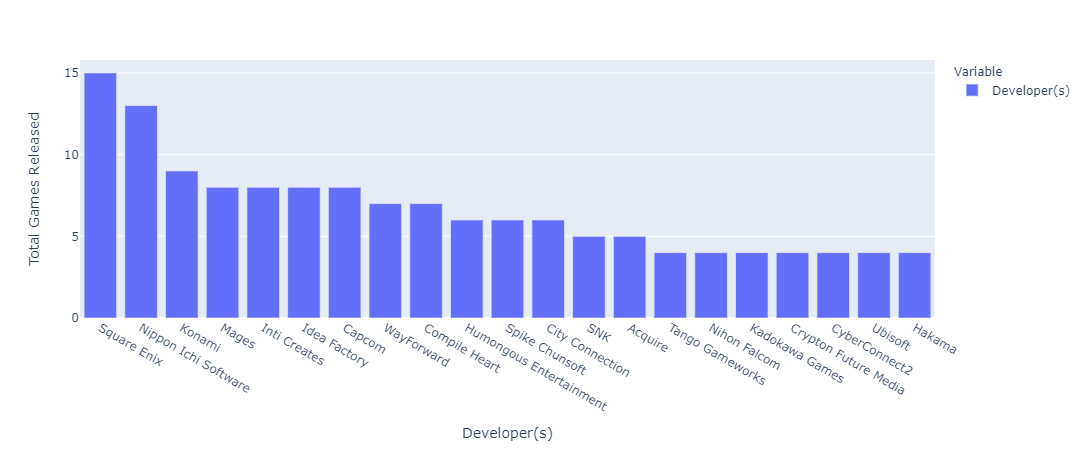

In [203]:
p_2=data_2['Developer(s)'].apply(lambda x:[i.strip() for i in x.split(',')]).explode().value_counts()[:21]
figure_1=px.bar(p_2)
figure_1.update_layout(
    title="",
    xaxis_title="Developer(s)",
    yaxis_title="Total Games Released",
    legend_title="Variable")

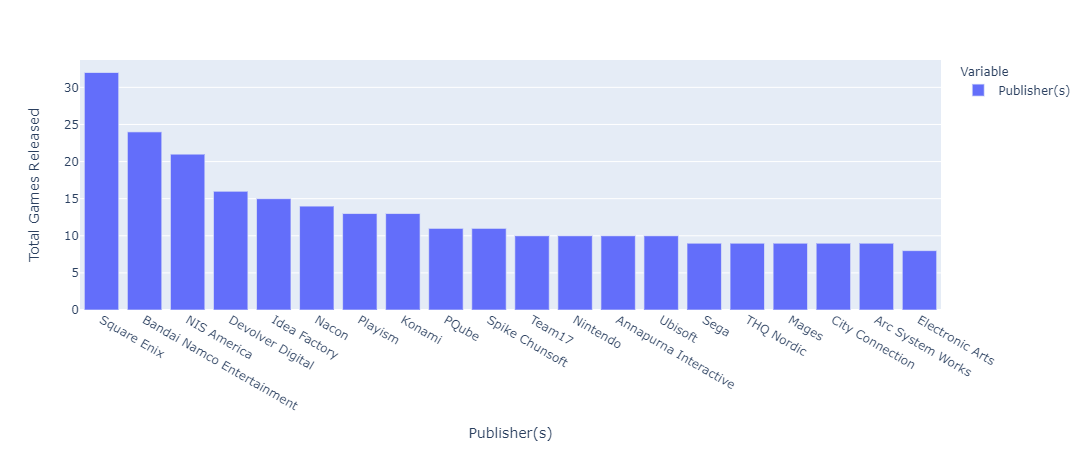

In [204]:
p_3=data_2['Publisher(s)'].apply(lambda x:[i.strip() for i in x.split(',')]).explode().value_counts()[:20]
figure_3=px.bar(p_3)
figure_3.update_layout(
    title="",
    xaxis_title="Publisher(s)",
    yaxis_title="Total Games Released",
    legend_title="Variable")

In [205]:
(data_3['Month'].dtype)

dtype('O')

In [206]:
data_3.head()

,Month,Day
0,JANUARY,3
1,JANUARY,3
2,JANUARY,4
3,JANUARY,4
4,JANUARY,6


In [207]:
#data_3 = data_3.replace(r'\s+', np.nan, regex=True)
#data_3['Month-Year'] = pd.to_datetime(data_3['Month']+ '-'+ data_3['Day']).dt.strftime('%d/%m')
#pd.to_datetime(data_3.Month + data_3.Day, errors='coerce').dt.strftime("%d/%m").replace("NaT", "")

In [208]:
#pd.to_datetime(data_3.Month + data_3.Day, errors='coerce').dt.strftime("%d/%m").replace("NaT", "")

In [209]:
data_4=data_2[['Month','Day','Month_1']]
data_4.head()

,Month,Day,Month_1
0,JANUARY,3,1
1,JANUARY,3,1
2,JANUARY,4,1
3,JANUARY,4,1
4,JANUARY,6,1


In [210]:
#data_4 = data_4.replace(r'\s+', np.nan, regex=True)
#data_4['Month-Year'] = pd.to_datetime(data_4['Month_1'].apply(str)+ '-'+ data_4['Day'].apply(str)).dt.strftime('%d/%m')

In [211]:
data_5=data_4[data_4['Month']=="JANUARY"]
#data_5

In [212]:
#data_5['Day'].unique()
#data_5
#figure_4=px.line(x=data_4[data_4['Month']=="FEBRUARY"]['Day'].unique(), y=data_4[data_4['Month']=="FEBRUARY"]['Day'].value_counts())
#fig_7=px.line(x=data_4[data_4['Month']=="JANUARY"]['Day'].unique(), y=data_4[data_4['Month']=="JANUARY"]['Day'].value_counts())
#fig_7=add_scatter(x=data_4[data_4['Month']=="FEBRUARY"]['Day'].unique(), y=data_4[data_4['Month']=="FEBRUARY"]['Day'].value_counts())
#fig_7

In [213]:
data_4['Month'].unique()

array(['JANUARY', 'FEBRUARY', 'MARCH', 'APRIL', 'MAY', 'JUNE', 'JULY',
       'AUGUST', 'SEPTEMBER', 'OCTOBER', 'NOVEMBER', 'DECEMBER'],
      dtype=object)

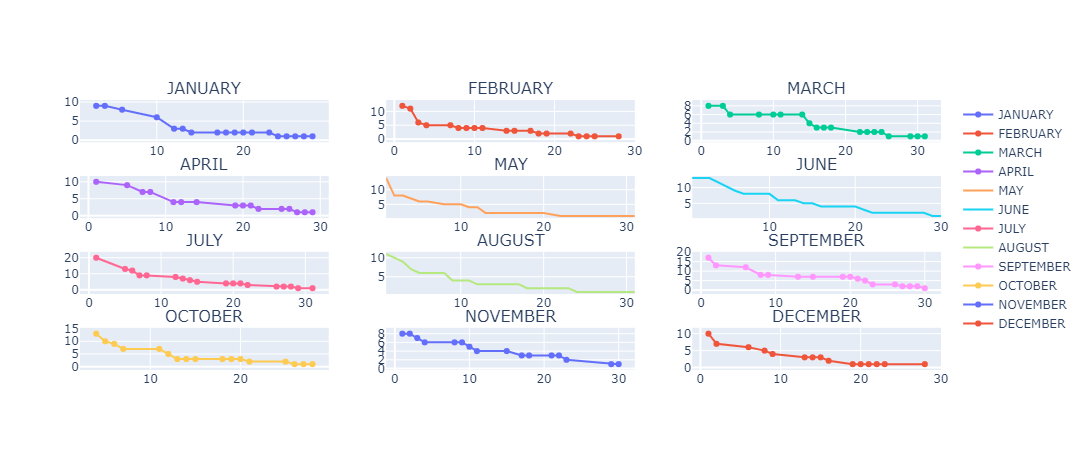

In [214]:
fig_6 = make_subplots(rows=4, cols=3,subplot_titles=('JANUARY', 'FEBRUARY', 'MARCH', 'APRIL', 'MAY', 'JUNE', 'JULY',
       'AUGUST', 'SEPTEMBER', 'OCTOBER', 'NOVEMBER', 'DECEMBER'))
#1_1
fig_6.add_trace(
    go.Scatter(x=data_4[data_4['Month']=="JANUARY"]['Day'].unique(), y=data_4[data_4['Month']=="JANUARY"]['Day'].value_counts(),name='JANUARY'),
    row=1, col=1)
#1_2
fig_6.add_trace(
    go.Scatter(x=data_4[data_4['Month']=="FEBRUARY"]['Day'].unique(), y=data_4[data_4['Month']=="FEBRUARY"]['Day'].value_counts(),name='FEBRUARY'),
    row=1, col=2)
#1_3
fig_6.add_trace(
    go.Scatter(x=data_4[data_4['Month']=="MARCH"]['Day'].unique(), y=data_4[data_4['Month']=="MARCH"]['Day'].value_counts(),name='MARCH'),
    row=1, col=3)

#2_1
fig_6.add_trace(
    go.Scatter(x=data_4[data_4['Month']=="APRIL"]['Day'].unique(), y=data_4[data_4['Month']=="APRIL"]['Day'].value_counts(),name='APRIL'),
    row=2, col=1)
#2_2
fig_6.add_trace(
    go.Scatter(x=data_4[data_4['Month']=="MAY"]['Day'].unique(), y=data_4[data_4['Month']=="MAY"]['Day'].value_counts(),name='MAY'),
    row=2, col=2)

#2_3
fig_6.add_trace(
    go.Scatter(x=data_4[data_4['Month']=="JUNE"]['Day'].unique(), y=data_4[data_4['Month']=="JUNE"]['Day'].value_counts(),name='JUNE'),
    row=2, col=3)
#3_1
fig_6.add_trace(
    go.Scatter(x=data_4[data_4['Month']=="JULY"]['Day'].unique(), y=data_4[data_4['Month']=="JULY"]['Day'].value_counts(),name='JULY'),
    row=3, col=1)

#3_2
fig_6.add_trace(
    go.Scatter(x=data_4[data_4['Month']=="AUGUST"]['Day'].unique(), y=data_4[data_4['Month']=="AUGUST"]['Day'].value_counts(),name='AUGUST'),
    row=3, col=2)

#3_3
fig_6.add_trace(
    go.Scatter(x=data_4[data_4['Month']=="SEPTEMBER"]['Day'].unique(), y=data_4[data_4['Month']=="SEPTEMBER"]['Day'].value_counts(),name='SEPTEMBER'),
    row=3, col=3)

#4_1
fig_6.add_trace(
    go.Scatter(x=data_4[data_4['Month']=="OCTOBER"]['Day'].unique(), y=data_4[data_4['Month']=="OCTOBER"]['Day'].value_counts(),name='OCTOBER'),
    row=4, col=1)

#4_2
fig_6.add_trace(
    go.Scatter(x=data_4[data_4['Month']=="NOVEMBER"]['Day'].unique(), y=data_4[data_4['Month']=="NOVEMBER"]['Day'].value_counts(),name='NOVEMBER'),
    row=4, col=2)

#4_3
fig_6.add_trace(
    go.Scatter(x=data_4[data_4['Month']=="DECEMBER"]['Day'].unique(), y=data_4[data_4['Month']=="DECEMBER"]['Day'].value_counts(),name='DECEMBER'),
    row=4, col=3)

### Video games often come out at the start of the month, likely as part of a marketing strategy. And the release  of Games increase the most in July and June.

In [215]:
data_4['Month'].unique()

array(['JANUARY', 'FEBRUARY', 'MARCH', 'APRIL', 'MAY', 'JUNE', 'JULY',
       'AUGUST', 'SEPTEMBER', 'OCTOBER', 'NOVEMBER', 'DECEMBER'],
      dtype=object)

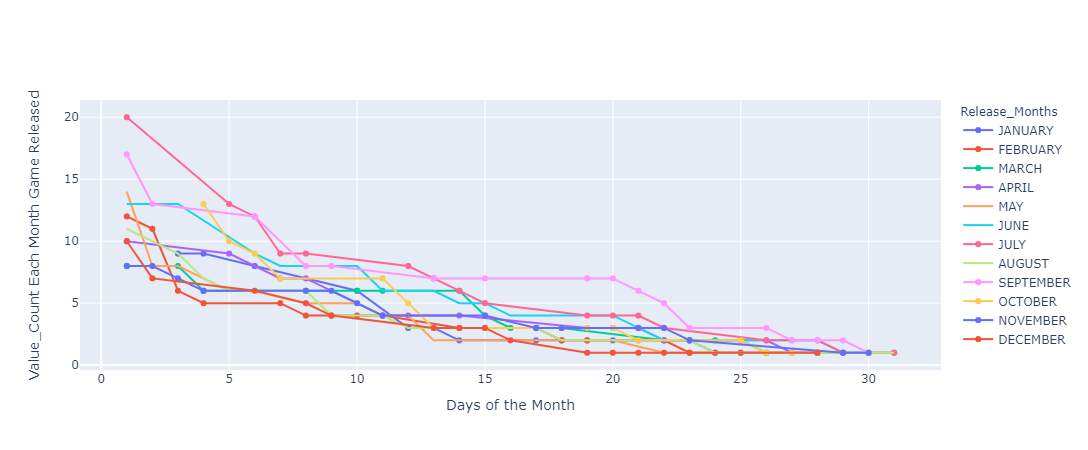

In [216]:
fig_8 = go.Figure()
#1
fig_8.add_scatter(x=data_4[data_4['Month']=="JANUARY"]['Day'].unique(), y=data_4[data_4['Month']=="JANUARY"]['Day'].value_counts(),name='JANUARY')
#2
fig_8.add_scatter(x=data_4[data_4['Month']=="FEBRUARY"]['Day'].unique(), y=data_4[data_4['Month']=="FEBRUARY"]['Day'].value_counts(),name='FEBRUARY')
#3
fig_8.add_scatter(x=data_4[data_4['Month']=="MARCH"]['Day'].unique(), y=data_4[data_4['Month']=="MARCH"]['Day'].value_counts(),name='MARCH')
#4
fig_8.add_scatter(x=data_4[data_4['Month']=="APRIL"]['Day'].unique(), y=data_4[data_4['Month']=="APRIL"]['Day'].value_counts(),name='APRIL')
#5
fig_8.add_scatter(x=data_4[data_4['Month']=="MAY"]['Day'].unique(), y=data_4[data_4['Month']=="MAY"]['Day'].value_counts(),name='MAY')
#6
fig_8.add_scatter(x=data_4[data_4['Month']=="JUNE"]['Day'].unique(), y=data_4[data_4['Month']=="JUNE"]['Day'].value_counts(),name='JUNE')
#7
fig_8.add_scatter(x=data_4[data_4['Month']=="JULY"]['Day'].unique(), y=data_4[data_4['Month']=="JULY"]['Day'].value_counts(),name='JULY')
#8
fig_8.add_scatter(x=data_4[data_4['Month']=="AUGUST"]['Day'].unique(), y=data_4[data_4['Month']=="AUGUST"]['Day'].value_counts(),name='AUGUST')
#9
fig_8.add_scatter(x=data_4[data_4['Month']=="SEPTEMBER"]['Day'].unique(), y=data_4[data_4['Month']=="SEPTEMBER"]['Day'].value_counts(),name='SEPTEMBER')
#10
fig_8.add_scatter(x=data_4[data_4['Month']=="OCTOBER"]['Day'].unique(), y=data_4[data_4['Month']=="OCTOBER"]['Day'].value_counts(),name='OCTOBER')
#11
fig_8.add_scatter(x=data_4[data_4['Month']=="NOVEMBER"]['Day'].unique(), y=data_4[data_4['Month']=="NOVEMBER"]['Day'].value_counts(),name='NOVEMBER')
#12
fig_8.add_scatter(x=data_4[data_4['Month']=="DECEMBER"]['Day'].unique(), y=data_4[data_4['Month']=="DECEMBER"]['Day'].value_counts(),name='DECEMBER')

fig_8.update_layout(
    title="",
    xaxis_title="Days of the Month",
    yaxis_title="Value_Count Each Month Game Released",
    legend_title="Release_Months")


fig_8.show()

### From the Line Chart we can clearly see that most games are relased at the start of the Month and then it decrease.

In [217]:
data_2.head()

,Month,Day,Title,Platform(s),Genre(s),Developer(s),Publisher(s),Month_1
0,JANUARY,3,Freddi Fish 3: The Case of the Stolen Conch Shell,NS,Adventure,Humongous Entertainment,UFO Interactive Games,1
1,JANUARY,3,Putt-Putt Travels Through Time,NS,Adventure,Humongous Entertainment,UFO Interactive Games,1
2,JANUARY,4,Deep Rock Galactic,"PS4, PS5",First-person shooter,Ghost Ship Games,Coffee Stain Publishing,1
3,JANUARY,4,The Pedestrian,"XBO, XSX","Puzzle, platform",Skookum Arts LLC,Skookum Arts LLC,1
4,JANUARY,6,Demon Gaze Extra,"NS, PS4",Role-playing,Cattle Call,Clouded Leopard Entertainment,1


In [218]:
data_6=data_2[['Month','Platform(s)','Genre(s)']]
#apply(lambda x:[i.strip() for i in x.split(',')]).explode()
dtt=data_6[['Month','Platform(s)']]
                                          #.apply(lambda x:[i.strip() for i in x.split(',')])
#dtt.style.hide_index()
#dtt


In [219]:
#dtt

In [220]:
#data_5=data_4[data_4['Month']=="JANUARY"]
#p=data_2['Platform(s)'].apply(lambda x:[i.strip() for i in x.split(',')]).explode().value_counts()
dt = pd.DataFrame(dtt['Platform(s)'].str.split(',').tolist(), index=dtt['Month']).stack()
dt = dt.reset_index([0, 'Month'])
dt.columns = ['Month', 'Platform(s)']
#new_df['Month'].str.strip()
#dt['Platform(s)'].str.strip()

In [221]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2528 entries, 0 to 2527
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        2528 non-null   object
 1   Platform(s)  2528 non-null   object
dtypes: object(2)
memory usage: 39.6+ KB


In [222]:
#dt

In [223]:
#p_11=data_6['Platform(s)'].apply(lambda x:[i.strip() for i in x.split(',')])
#dt=data_1[['Platform(s)','Month']].apply(lambda x: x.str.split(',').explode())


In [224]:
#dt=data_1[['Platform(s)','Month']].apply(lambda x: x.str.split(',').explode())


In [225]:
p_9=dt[dt['Platform(s)'].str.strip()=="PS4"]
p_9.reset_index()

,index,Month,Platform(s)
0,2,JANUARY,PS4
1,7,JANUARY,PS4
2,14,JANUARY,PS4
3,21,JANUARY,PS4
4,36,JANUARY,PS4
...,...,...,...
399,2501,DECEMBER,PS4
400,2506,DECEMBER,PS4
401,2512,DECEMBER,PS4
402,2522,DECEMBER,PS4


In [226]:
p1311

NS            490
Win           487
PS4           404
PS5           317
XBO           304
XSX           284
iOS            54
Mac            50
Stadia         46
Droid          44
Lin            32
Atari VCS       4
PS5WW: Win      2
                2
[c] PS4[c]      1
Arcade          1
3DS             1
EU: NS          1
JP: NS          1
PS4WW: Win      1
| Droid         1
JP: PS4         1
Name: Platform(s), dtype: int64

In [227]:
dt[dt['Platform(s)']=="PS5"].value_counts().sum()

40

In [228]:
data_7=data_2[['Month','Genre(s)']]
data_7 = pd.DataFrame(data_7['Genre(s)'].str.split(',').tolist(), index=data_7['Month']).stack()
data_7 = data_7.reset_index([0, 'Month'])
data_7.columns = ['Month', 'Genre(s)']
#x=data_4[data_4['Month']=="FEBRUARY"]['Day'].unique(), y=data_4[data_4['Month']=="FEBRUARY"]['Day'].value_counts()

In [229]:
#x=data_4[data_4['Month']=="FEBRUARY"]['Day'].unique(), y=data_4[data_4['Month']=="FEBRUARY"]['Day'].value_counts())

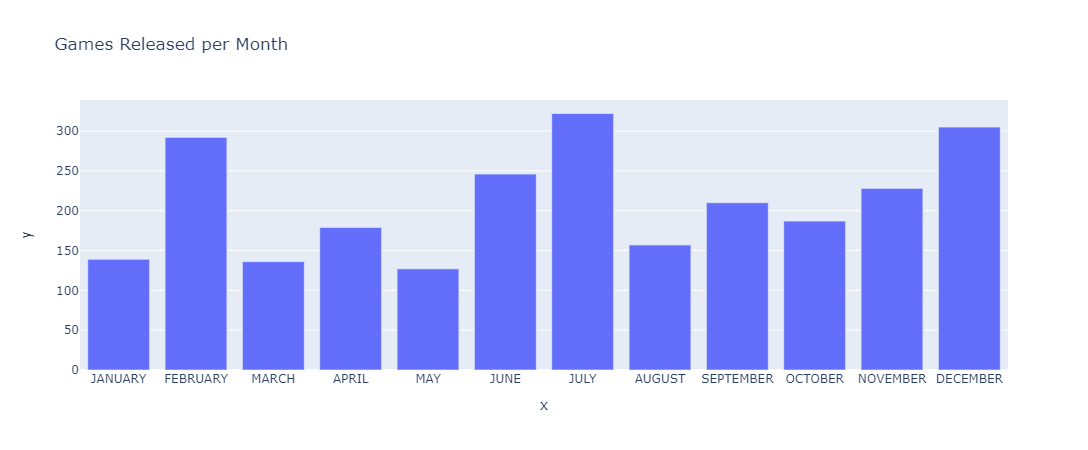

In [230]:
Month_1_1=dt['Month'].unique()
Month_1_1_value_count=dt['Month'].value_counts().sort_index()
fig_2_2=px.bar(x=Month_1_1,y=Month_1_1_value_count,title='Games Released per Month')
fig_2_2

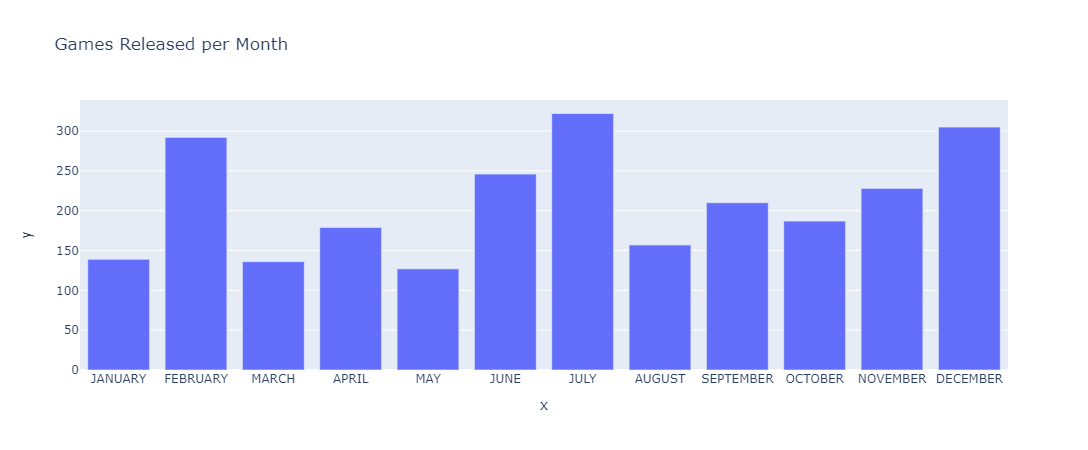

In [231]:
fig_2_2=px.bar(x=Month_1_1,y=Month_1_1_value_count,title='Games Released per Month')
fig_2_2

In [232]:
#data_7['Publisher(s)'].value_counts()
data_2

,Month,Day,Title,Platform(s),Genre(s),Developer(s),Publisher(s),Month_1
0,JANUARY,3,Freddi Fish 3: The Case of the Stolen Conch Shell,NS,Adventure,Humongous Entertainment,UFO Interactive Games,1
1,JANUARY,3,Putt-Putt Travels Through Time,NS,Adventure,Humongous Entertainment,UFO Interactive Games,1
2,JANUARY,4,Deep Rock Galactic,"PS4, PS5",First-person shooter,Ghost Ship Games,Coffee Stain Publishing,1
3,JANUARY,4,The Pedestrian,"XBO, XSX","Puzzle, platform",Skookum Arts LLC,Skookum Arts LLC,1
4,JANUARY,6,Demon Gaze Extra,"NS, PS4",Role-playing,Cattle Call,Clouded Leopard Entertainment,1
...,...,...,...,...,...,...,...,...
982,DECEMBER,22,Uta no Prince-sama All Star After Secret,NS,Visual novel,Nippon Ichi Software,Broccoli,12
983,DECEMBER,22,Valkyrie Profile: Lenneth,"PS4, PS5",Role-playing,tri-Ace,Square Enix,12
984,DECEMBER,22,Naraka: Bladepoint,XBO,"Action-adventure, battle royale",Thunder Fire Universe X Studio,NetEase Games,12
985,DECEMBER,23,Sports Story,NS,"Adventure, sports",Sidebar Games,Sidebar Games,12


In [233]:
dtt_1=data_2[['Month','Platform(s)','Day']]
s = dtt_1['Platform(s)'].str.split(',').apply(pd.Series,0).stack()
#s=pd.DataFrame(dtt_1['Platform(s)'].str.split(',').tolist(), index=dtt_1['Month']).stack()
#s = s.reset_index([0, 'Month'])
s.index = s.index.droplevel(-1)
s.name='Platform(s)' 
del dtt_1['Platform(s)']
#dtt_1
tp=dtt_1.join(s)
tp
tp.head(10)


,Month,Day,Platform(s)
0,JANUARY,3,NS
1,JANUARY,3,NS
2,JANUARY,4,PS4
2,JANUARY,4,PS5
3,JANUARY,4,XBO
3,JANUARY,4,XSX
4,JANUARY,6,NS
4,JANUARY,6,PS4
5,JANUARY,6,NS
6,JANUARY,10,NS


In [234]:
figure_99=px.line(x=tp[tp['Month']=="FEBRUARY"]['Day'].unique(), y=tp[tp['Month']=="FEBRUARY"]['Day'].value_counts())
#figure_99
#e=tp[tp['Platform(s)'].str.strip()=="NS"]
fig_989=px.line(x=tp[tp['Platform(s)'].str.strip()=="NS"]['Month'].unique(), y=tp[tp['Platform(s)'].str.strip()=="NS"]['Month'].value_counts())
#fig_989

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



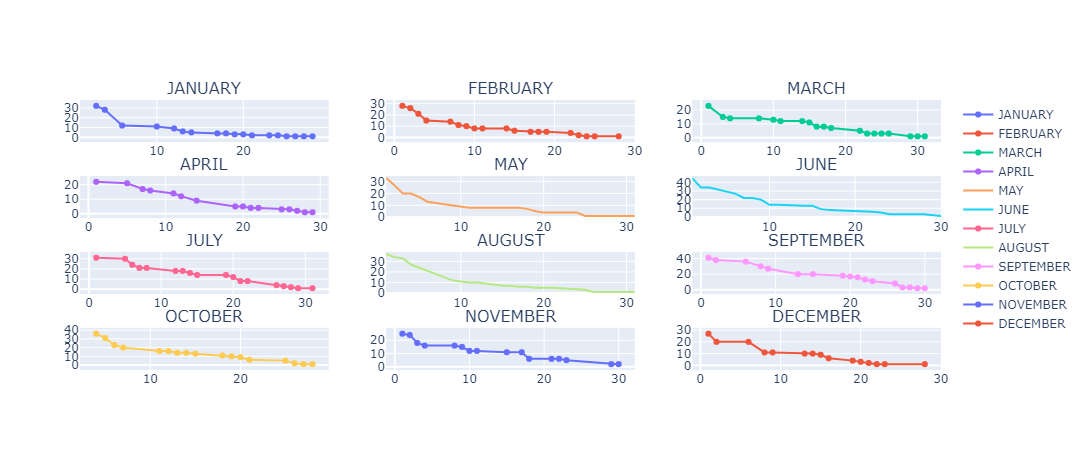

In [235]:
fig_66 = make_subplots(rows=4, cols=3,subplot_titles=('JANUARY', 'FEBRUARY', 'MARCH', 'APRIL', 'MAY', 'JUNE', 'JULY',
       'AUGUST', 'SEPTEMBER', 'OCTOBER', 'NOVEMBER', 'DECEMBER'))
#1_1
fig_66.add_trace(
    go.Scatter(x=tp[tp['Month']=="JANUARY"]['Day'].unique(), y=tp[tp['Month']=="JANUARY"]['Day'].value_counts(),name='JANUARY'),
    row=1, col=1)
#1_2
fig_66.add_trace(
    go.Scatter(x=tp[tp['Month']=="FEBRUARY"]['Day'].unique(), y=tp[tp['Month']=="FEBRUARY"]['Day'].value_counts(),name='FEBRUARY'),
    row=1, col=2)
#1_3
fig_66.add_trace(
    go.Scatter(x=tp[tp['Month']=="MARCH"]['Day'].unique(), y=tp[data_4['Month']=="MARCH"]['Day'].value_counts(),name='MARCH'),
    row=1, col=3)

#2_1
fig_66.add_trace(
    go.Scatter(x=tp[tp['Month']=="APRIL"]['Day'].unique(), y=tp[tp['Month']=="APRIL"]['Day'].value_counts(),name='APRIL'),
    row=2, col=1)
#2_2
fig_66.add_trace(
    go.Scatter(x=tp[tp['Month']=="MAY"]['Day'].unique(), y=tp[tp['Month']=="MAY"]['Day'].value_counts(),name='MAY'),
    row=2, col=2)

#2_3
fig_66.add_trace(
    go.Scatter(x=tp[tp['Month']=="JUNE"]['Day'].unique(), y=tp[tp['Month']=="JUNE"]['Day'].value_counts(),name='JUNE'),
    row=2, col=3)
#3_1
fig_66.add_trace(
    go.Scatter(x=tp[tp['Month']=="JULY"]['Day'].unique(), y=tp[tp['Month']=="JULY"]['Day'].value_counts(),name='JULY'),
    row=3, col=1)

#3_2
fig_66.add_trace(
    go.Scatter(x=tp[tp['Month']=="AUGUST"]['Day'].unique(), y=tp[tp['Month']=="AUGUST"]['Day'].value_counts(),name='AUGUST'),
    row=3, col=2)

#3_3
fig_66.add_trace(
    go.Scatter(x=tp[tp['Month']=="SEPTEMBER"]['Day'].unique(), y=tp[tp['Month']=="SEPTEMBER"]['Day'].value_counts(),name='SEPTEMBER'),
    row=3, col=3)

#4_1
fig_66.add_trace(
    go.Scatter(x=tp[tp['Month']=="OCTOBER"]['Day'].unique(), y=tp[tp['Month']=="OCTOBER"]['Day'].value_counts(),name='OCTOBER'),
    row=4, col=1)

#4_2
fig_66.add_trace(
    go.Scatter(x=tp[tp['Month']=="NOVEMBER"]['Day'].unique(), y=tp[tp['Month']=="NOVEMBER"]['Day'].value_counts(),name='NOVEMBER'),
    row=4, col=2)

#4_3
fig_66.add_trace(
    go.Scatter(x=tp[tp['Month']=="DECEMBER"]['Day'].unique(), y=tp[tp['Month']=="DECEMBER"]['Day'].value_counts(),name='DECEMBER'),
    row=4, col=3)

In [236]:
tp.head()

,Month,Day,Platform(s)
0,JANUARY,3,NS
1,JANUARY,3,NS
2,JANUARY,4,PS4
2,JANUARY,4,PS5
3,JANUARY,4,XBO


In [237]:
z=tp[tp['Platform(s)'].str.strip()=="Win"]['Month'].value_counts()
#px.line(z)

In [238]:
#NS
t=tp[tp['Platform(s)'].str.strip()=="NS"]['Month'].value_counts()
p=tp[tp['Platform(s)'].str.strip()=="NS"]['Month'].unique()
ser = pd.Series(t, name = 'Technology')
ser_df = pd.DataFrame(ser, columns = ['Technology'])
ser_df
#ser_df['t'] = range(1, len(ser_df) + 1)
ser_df = ser_df.reset_index()
ser_df.rename(columns={'index': 'Col_1', 'Technology': 'Col_3'})
ser_df.index=pd.CategoricalIndex(ser_df['index'],categories=p,ordered=True)
p_12_1=ser_df.sort_index()

#p_12_1

#Win


In [239]:
#ps4
t_1_1=tp[tp['Platform(s)'].str.strip()=="PS4"]['Month'].value_counts()
p_1_1=tp[tp['Platform(s)'].str.strip()=="PS4"]['Month'].unique()
t_1_1


#ser_1 = pd.Series(t_1_1, name = 'Technology')
ser_df_1 = pd.DataFrame(pd.Series(t_1_1, name = 'Technology'), columns = ['Technology'])
ser_df_1


ser_df_1 = ser_df_1.reset_index()
ser_df_1.rename(columns={'index': 'Col_1', 'Technology': 'Col_3'})
ser_df_1.index=pd.CategoricalIndex(ser_df_1['index'],categories=p_1_1,ordered=True)
p_12_2=ser_df_1.sort_index()
#p_12_2

In [240]:
#Win
t_1_2=tp[tp['Platform(s)'].str.strip()=="Win"]['Month'].value_counts()
p_1_2=tp[tp['Platform(s)'].str.strip()=="Win"]['Month'].unique()
t_1_2


#ser_1 = pd.Series(t_1_1, name = 'Technology')
ser_df_2 = pd.DataFrame(pd.Series(t_1_2, name = 'Technology'), columns = ['Technology'])
ser_df_2


ser_df_2 = ser_df_2.reset_index()
ser_df_2.rename(columns={'index': 'Col_1', 'Technology': 'Col_3'})
ser_df_2.index=pd.CategoricalIndex(ser_df_2['index'],categories=p_1_2,ordered=True)
p_12_3=ser_df_2.sort_index()
#p_12_3

In [241]:
#PS5
t_1_3=tp[tp['Platform(s)'].str.strip()=="PS5"]['Month'].value_counts()
p_1_3=tp[tp['Platform(s)'].str.strip()=="PS5"]['Month'].unique()
t_1_3


#ser_1 = pd.Series(t_1_1, name = 'Technology')
ser_df_3 = pd.DataFrame(pd.Series(t_1_3, name = 'Technology'), columns = ['Technology'])
ser_df_3


ser_df_3 = ser_df_3.reset_index()
ser_df_3.rename(columns={'index': 'Col_1', 'Technology': 'Col_3'})
ser_df_3.index=pd.CategoricalIndex(ser_df_3['index'],categories=p_1_3,ordered=True)
p_12_4=ser_df_3.sort_index()
#p_12_4

#
#XBO
t_1_4=tp[tp['Platform(s)'].str.strip()=="XBO"]['Month'].value_counts()
p_1_4=tp[tp['Platform(s)'].str.strip()=="XBO"]['Month'].unique()
t_1_4


#ser_1 = pd.Series(t_1_1, name = 'Technology')
ser_df_4 = pd.DataFrame(pd.Series(t_1_4, name = 'Technology'), columns = ['Technology'])
ser_df_4


ser_df_4 = ser_df_4.reset_index()
ser_df_4.rename(columns={'index': 'Col_1', 'Technology': 'Col_3'})
ser_df_4.index=pd.CategoricalIndex(ser_df_4['index'],categories=p_1_4,ordered=True)
p_12_5=ser_df_4.sort_index()
#p_12_5

#XSX
t_1_5=tp[tp['Platform(s)'].str.strip()=="XSX"]['Month'].value_counts()
p_1_5=tp[tp['Platform(s)'].str.strip()=="XSX"]['Month'].unique()
t_1_5


#ser_1 = pd.Series(t_1_1, name = 'Technology')
ser_df_5 = pd.DataFrame(pd.Series(t_1_5, name = 'Technology'), columns = ['Technology'])
ser_df_5


ser_df_5 = ser_df_5.reset_index()
ser_df_5.rename(columns={'index': 'Col_1', 'Technology': 'Col_3'})
ser_df_5.index=pd.CategoricalIndex(ser_df_5['index'],categories=p_1_5,ordered=True)
p_12_6=ser_df_5.sort_index()
#p_12_6

#iOS
t_1_6=tp[tp['Platform(s)'].str.strip()=="iOS"]['Month'].value_counts()
p_1_6=tp[tp['Platform(s)'].str.strip()=="iOS"]['Month'].unique()
t_1_6


#ser_1 = pd.Series(t_1_1, name = 'Technology')
ser_df_6 = pd.DataFrame(pd.Series(t_1_6, name = 'Technology'), columns = ['Technology'])
ser_df_6


ser_df_6 = ser_df_6.reset_index()
ser_df_6.rename(columns={'index': 'Col_1', 'Technology': 'Col_3'})
ser_df_6.index=pd.CategoricalIndex(ser_df_6['index'],categories=p_1_6,ordered=True)
p_12_7=ser_df_6.sort_index()
#p_12_7

#Mac
t_1_7=tp[tp['Platform(s)'].str.strip()=="Mac"]['Month'].value_counts()
p_1_7=tp[tp['Platform(s)'].str.strip()=="Mac"]['Month'].unique()
t_1_7


#ser_1 = pd.Series(t_1_1, name = 'Technology')
ser_df_7 = pd.DataFrame(pd.Series(t_1_7, name = 'Technology'), columns = ['Technology'])
ser_df_7


ser_df_7 = ser_df_7.reset_index()
ser_df_7.rename(columns={'index': 'Col_1', 'Technology': 'Col_3'})
ser_df_7.index=pd.CategoricalIndex(ser_df_7['index'],categories=p_1_7,ordered=True)
p_12_8=ser_df_7.sort_index()
#p_12_8
#--------------------------------------------------------------
#Stadia

t_1_8=tp[tp['Platform(s)'].str.strip()=="Stadia"]['Month'].value_counts()
p_1_8=tp[tp['Platform(s)'].str.strip()=="Stadia"]['Month'].unique()
t_1_8


#ser_1 = pd.Series(t_1_1, name = 'Technology')
ser_df_8 = pd.DataFrame(pd.Series(t_1_8, name = 'Technology'), columns = ['Technology'])
ser_df_8


ser_df_8 = ser_df_8.reset_index()
ser_df_8.rename(columns={'index': 'Col_1', 'Technology': 'Col_3'})
ser_df_8.index=pd.CategoricalIndex(ser_df_8['index'],categories=p_1_7,ordered=True)
p_12_9=ser_df_8.sort_index()
#-------------------------------
#Droid

t_1_9=tp[tp['Platform(s)'].str.strip()=="Droid"]['Month'].value_counts()
p_1_9=tp[tp['Platform(s)'].str.strip()=="Droid"]['Month'].unique()
t_1_9


#ser_1 = pd.Series(t_1_1, name = 'Technology')
ser_df_9 = pd.DataFrame(pd.Series(t_1_9, name = 'Technology'), columns = ['Technology'])
ser_df_9


ser_df_9 = ser_df_9.reset_index()
ser_df_9.rename(columns={'index': 'Col_1', 'Technology': 'Col_3'})
ser_df_9.index=pd.CategoricalIndex(ser_df_9['index'],categories=p_1_9,ordered=True)
p_12_10=ser_df_8.sort_index()
#p_12

In [242]:
#p_12_10

In [243]:
#p_12_1

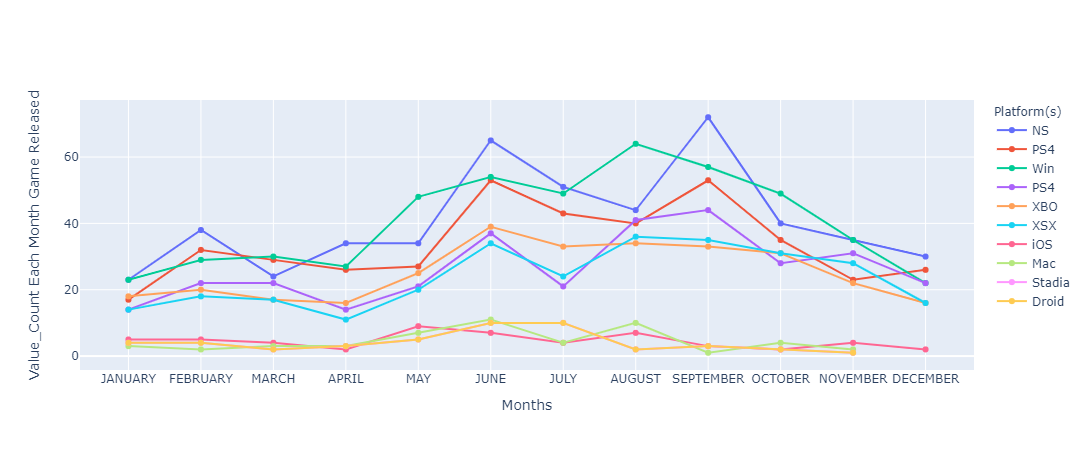

In [244]:
fig_911_1 = go.Figure()
#1
fig_911_1.add_scatter(x=p_12_1['index'],y=p_12_1['Technology'],name='NS')
#2
fig_911_1.add_scatter(x=p_12_2['index'],y=p_12_2['Technology'],name='PS4')
#3
fig_911_1.add_scatter(x=p_12_3['index'],y=p_12_3['Technology'],name='Win')
#4
fig_911_1.add_scatter(x=p_12_4['index'],y=p_12_4['Technology'],name='PS4')
#5
fig_911_1.add_scatter(x=p_12_5['index'],y=p_12_5['Technology'],name='XBO')
#6
fig_911_1.add_scatter(x=p_12_6['index'],y=p_12_6['Technology'],name='XSX')
#7
fig_911_1.add_scatter(x=p_12_7['index'],y=p_12_7['Technology'],name='iOS')
#8
fig_911_1.add_scatter(x=p_12_8['index'],y=p_12_8['Technology'],name='Mac')
#9
fig_911_1.add_scatter(x=p_12_9['index'],y=p_12_9['Technology'],name='Stadia')
#10
fig_911_1.add_scatter(x=p_12_10['index'],y=p_12_10['Technology'],name='Droid')

fig_911_1.update_layout(
    title="",
    xaxis_title="Months",
    yaxis_title="Value_Count Each Month Game Released",
    legend_title="Platform(s)")

In [245]:
#PS5
t_1_3=tp[tp['Platform(s)'].str.strip()=="PS5"]['Month'].value_counts()
p_1_3=tp[tp['Platform(s)'].str.strip()=="PS5"]['Month'].unique()
t_1_3


#ser_1 = pd.Series(t_1_1, name = 'Technology')
ser_df_3 = pd.DataFrame(pd.Series(t_1_3, name = 'Technology'), columns = ['Technology'])
ser_df_3


ser_df_3 = ser_df_3.reset_index()
ser_df_3.rename(columns={'index': 'Col_1', 'Technology': 'Col_3'})
ser_df_3.index=pd.CategoricalIndex(ser_df_3['index'],categories=p_1_3,ordered=True)
p_12_4=ser_df_3.sort_index()
p_12_4

,index,Technology
index,,
JANUARY,JANUARY,14
FEBRUARY,FEBRUARY,22
MARCH,MARCH,22
APRIL,APRIL,14
MAY,MAY,21
JUNE,JUNE,37
JULY,JULY,21
AUGUST,AUGUST,41
SEPTEMBER,SEPTEMBER,44


In [246]:
tp[tp['Platform(s)'].str.strip()=="NS"]['Month'].unique()

array(['JANUARY', 'FEBRUARY', 'MARCH', 'APRIL', 'MAY', 'JUNE', 'JULY',
       'AUGUST', 'SEPTEMBER', 'OCTOBER', 'NOVEMBER', 'DECEMBER'],
      dtype=object)

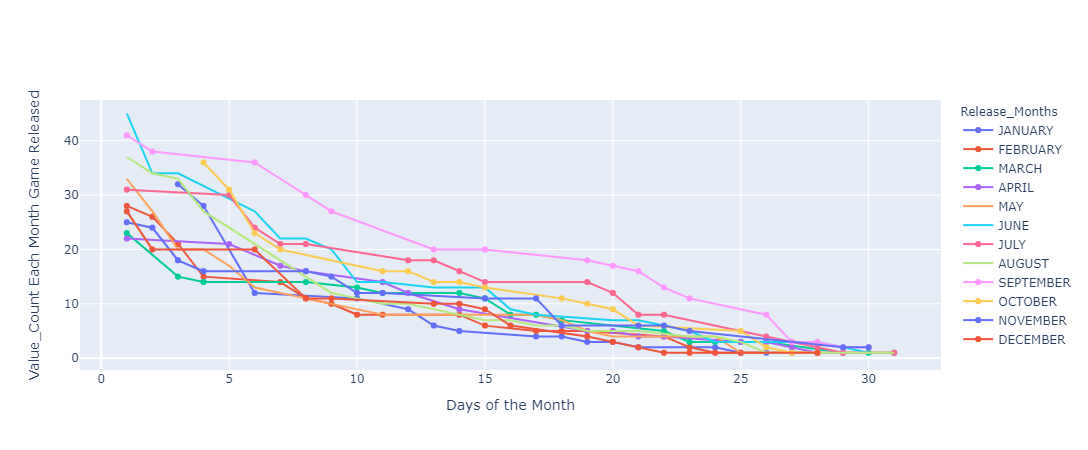

In [247]:
fig_81 = go.Figure()
#1
fig_81.add_scatter(x=tp[tp['Month']=="JANUARY"]['Day'].unique(), y=tp[tp['Month']=="JANUARY"]['Day'].value_counts(),name='JANUARY')
#2
fig_81.add_scatter(x=tp[tp['Month']=="FEBRUARY"]['Day'].unique(), y=tp[tp['Month']=="FEBRUARY"]['Day'].value_counts(),name='FEBRUARY')
#3
fig_81.add_scatter(x=tp[tp['Month']=="MARCH"]['Day'].unique(), y=tp[tp['Month']=="MARCH"]['Day'].value_counts(),name='MARCH')
#4
fig_81.add_scatter(x=tp[tp['Month']=="APRIL"]['Day'].unique(), y=tp[tp['Month']=="APRIL"]['Day'].value_counts(),name='APRIL')
#5
fig_81.add_scatter(x=tp[tp['Month']=="MAY"]['Day'].unique(), y=tp[tp['Month']=="MAY"]['Day'].value_counts(),name='MAY')
#6
fig_81.add_scatter(x=tp[tp['Month']=="JUNE"]['Day'].unique(), y=tp[tp['Month']=="JUNE"]['Day'].value_counts(),name='JUNE')
#7
fig_81.add_scatter(x=tp[tp['Month']=="JULY"]['Day'].unique(), y=tp[tp['Month']=="JULY"]['Day'].value_counts(),name='JULY')
#8
fig_81.add_scatter(x=tp[tp['Month']=="AUGUST"]['Day'].unique(), y=tp[tp['Month']=="AUGUST"]['Day'].value_counts(),name='AUGUST')
#9
fig_81.add_scatter(x=tp[tp['Month']=="SEPTEMBER"]['Day'].unique(), y=tp[tp['Month']=="SEPTEMBER"]['Day'].value_counts(),name='SEPTEMBER')
#10
fig_81.add_scatter(x=tp[tp['Month']=="OCTOBER"]['Day'].unique(), y=tp[tp['Month']=="OCTOBER"]['Day'].value_counts(),name='OCTOBER')
#11
fig_81.add_scatter(x=tp[tp['Month']=="NOVEMBER"]['Day'].unique(), y=tp[tp['Month']=="NOVEMBER"]['Day'].value_counts(),name='NOVEMBER')
#12
fig_81.add_scatter(x=tp[tp['Month']=="DECEMBER"]['Day'].unique(), y=tp[tp['Month']=="DECEMBER"]['Day'].value_counts(),name='DECEMBER')

fig_81.update_layout(
    title="",
    xaxis_title="Days of the Month",
    yaxis_title="Value_Count Each Month Game Released",
    legend_title="Release_Months")


fig_81.show()

In [248]:
#tp

In [249]:
tp[tp['Month'].str.strip()=="JANUARY"].value_counts().sum()


127

In [250]:
tp[tp['Month'].str.strip()=="FEBRUARY"].value_counts().sum()

179

In [251]:
tp[tp['Platform(s)'].str.strip()=="NS"].head()

,Month,Day,Platform(s)
0,JANUARY,3,NS
1,JANUARY,3,NS
4,JANUARY,6,NS
5,JANUARY,6,NS
6,JANUARY,10,NS


In [252]:
Month_1_2=tp['Month'].unique()
Month_1_2_value_count=tp['Month'].value_counts().sort_index()

In [253]:
Month_1_2_value_count

APRIL        139
AUGUST       292
DECEMBER     136
FEBRUARY     179
JANUARY      127
JULY         246
JUNE         322
MARCH        157
MAY          210
NOVEMBER     187
OCTOBER      228
SEPTEMBER    305
Name: Month, dtype: int64

In [254]:
Mont_12_1=[127, 179, 157, 139, 210, 322,246,292,305, 228, 187, 136]

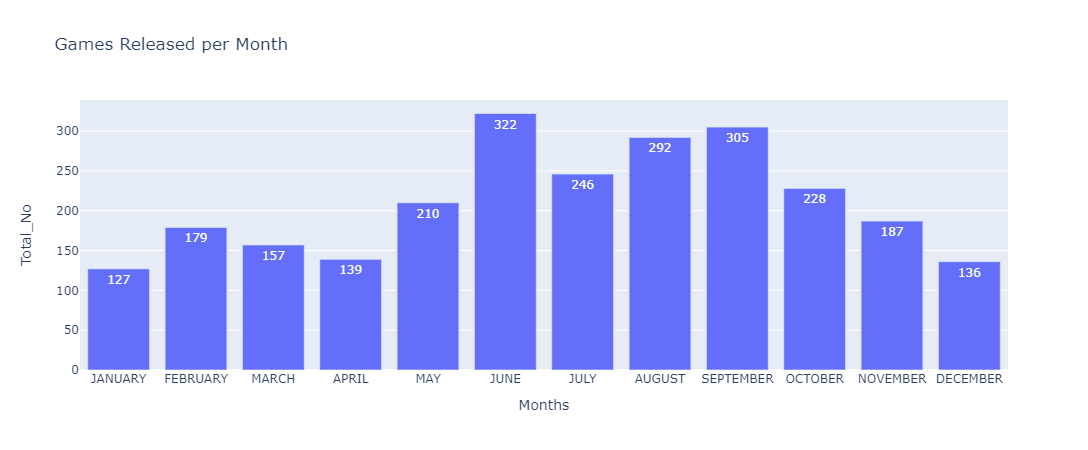

In [255]:
fig_33=px.bar(x=Month_1_2,y=Mont_12_1,title='Games Released per Month')
fig_33.update_layout(
    title="Games Released per Month",
    xaxis_title="Months",
    yaxis_title="Total_No")
fig_33.update_traces(text=Mont_12_1)